## Topic: Obesity, Physical Activity and Diet (England) 
---

### In this project, I use three datasets which are about obesity related hospital admissions.

### Variables used in the datasets:

|<center> Definition of| Variables used in the datasets|
|:------------|:-------------------------------------------------------------------------------------------| 
| <center>   Year     | Financial year within which the episode finished|
| <center>   ONS_Code  | ONS nine-character geographic code|
| <center>  Org_Code  | ODS organisational code|
| <center>  Org_Name   | ODS organisational name|
| <center>  Org_Type   | ODS organisational type|
| <center>Classification|Measure by which the metrics can be broken down by: <br/><br/> FAE_Primary_Obesity – Finished Admission Episodes with a primary diagnosis of Obesity <br/> (Admissions directly attributed to obesity) <br/><br/> FAE_PrimarySecondary_Obesity - Finished Admission Episodes with a primary or secondary diagnosis of obesity  <br/> (Admissions where obesity was a factor) <br/><br/> FCE_PrimarySecondary_Obesity_Bariatric - Finished Consultant Episodes with a primary diagnosis of obesity and a main or secondary procedure of 'Bariatric Surgery' <br/> (Obesity related bariatric surgery)|
| <center> Metric_Primary|Demographic by which the data is presented (gender or age group)|
| <center>Metric_Secondary|Demographic breakdown|
| <center>Value|Number of admissions for each Classification/Metric|


* Note: 
    1. Org_Type. Org_Name, Org_Code different between three datasets
    2. Both CGG and LA datasets have missing value

Datasets Source:https://digital.nhs.uk/catalogue/PUB23742

## Questions for Time Series Dataset
1. check doc 'obes-phys-acti-diet-eng-2017-rep' p8,p9, p16
2. Do analysis by age group, gender, by different year, calculate increased percentage

## Questions for CGG Dataset
1. Calculate Obesity Prevalence by region (check doc 'obes-phys-acti-diet-eng-2017-rep' p15)

## Difference between df1 & df2 -> only the region
1. df1 only include England, while df2 include other part of England (south England...)
2. df1 include different time span, but df2 only include 2015/16
3. df2 have missing value on Org_Type, Value

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
## read library ##

import pandas as pd
import numpy as np
import os

## read data ##

#path="/Users/chloe/Desktop/ST445_Project"
path='/Users/lin/Desktop/ST445_Project' # another laptop
os.chdir(path)
df1 = pd.read_csv('Time_series_data_1516.csv', sep=',') # Time Series Dataset
df2 = pd.read_csv('CCG_data_1516.csv', sep=',') # CCG: Clinical Commissioning Groups
df3 = pd.read_csv('LA_data_1516.csv', sep=',')
all = [df1, df2, df3]

In [3]:
## check dimension and missing value ##
for df in all:
    print(df.shape)
for df in all:
    print(df.isnull().sum())

(462, 16)
(2043, 8)
(1458, 8)
Year                  0
ONS_Code              0
Org_Code              0
Org_Name              0
Classification        0
Metric_Primary        0
Metric_Secondary      0
Value                 0
Unnamed: 8          462
Unnamed: 9          462
Unnamed: 10         462
Unnamed: 11         462
Unnamed: 12         462
Unnamed: 13         462
Unnamed: 14         462
Unnamed: 15         462
dtype: int64
Year              0
Org_Type          0
ONS_Code          0
Org_Code          9
Org_Name          0
Classification    0
Metric_Primary    0
Value             0
dtype: int64
Year              0
Org_Type          0
ONS_Code          0
Org_Code          9
Org_Name          0
Classification    0
Metric_Primary    0
Value             0
dtype: int64


In [4]:
## drop extra columns in df1 ##

df1.drop(df1.columns[[8,9,10,11,12,13,14,15]], axis=1, inplace=True)

## sort the time series data by year, classification, metric_primary and reset index 
## because sort will change the order##

df1 = df1.sort_index(by=['Year','Classification','Metric_Primary']).reset_index(drop=True)

/Users/lin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  


## Analyse Dataset1
---

### Observe the trend of Obesity related hospital admissions over the year
(1) Sum value by 'Year' & 'Clssification' when Metric_Primary==AgeGroup <br/>
    -> the result should be the same as the value when Metric_Primary==Gender & Metric_Secondary==All persons<br/> 
    -> However, it seems that the results calculated by us are slightly different from the given
    
(2) Pivot df1_s <br/>
    -> 2.1 plot the data (with three classes) <br/>
    -> 2.2 plot the data but separate three classes
    
### Observe the Obesity related hospital admissions by gender
  
(3) Plot pie chart of different gender for three different classes <br/> (FAE_PrimarySecondary_Obesity, FAE_Primary_Obesity, FCE_PrimarySecondary_Obesity_Bariatric)

### Observe the Obesity related hospital admissions by gender

(4) Plot the bar chart of different age groups for three different classes


In [5]:
## 1 ##
df1_s = df1[df1.Metric_Primary=='AgeGroup'].groupby(['Year', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count'}).reset_index()

df1 = pd.merge(df1, df1_s, how='left', on=['Year', 'Classification']) # merge count to df1
df1[df1.Metric_Secondary=='All persons'].head(5) # slight difference b/w value and count
#df0 = df1.loc[df1['Metric_Primary']=='AgeGroup'].groupby(['Year', 'Classification'])[['Value']].sum().rename(columns={'Value': 'Count'}).reset_index()

Year   ONS_Code Org_Code Org_Name  \
8   2002/03  E92000001      ENG  England   
19  2002/03  E92000001      ENG  England   
30  2002/03  E92000001      ENG  England   
41  2003/04  E92000001      ENG  England   
52  2003/04  E92000001      ENG  England   

                            Classification Metric_Primary Metric_Secondary  \
8             FAE_PrimarySecondary_Obesity         Gender      All persons   
19                     FAE_Primary_Obesity         Gender      All persons   
30  FCE_PrimarySecondary_Obesity_Bariatric         Gender      All persons   
41            FAE_PrimarySecondary_Obesity         Gender      All persons   
52                     FAE_Primary_Obesity         Gender      All persons   

    Value  Count  
8   29237  29199  
19   1275   1275  
30    345    345  
41  33546  33524  
52   1711   1711

In [6]:
## 2 ##
df1_sp = df1_s.pivot(index='Classification', columns='Year', values='Count')
df1_sp

Year                                    2002/03  2003/04  2004/05  2005/06  \
Classification                                                               
FAE_PrimarySecondary_Obesity              29199    33524    40724    51997   
FAE_Primary_Obesity                        1275     1711     2034     2561   
FCE_PrimarySecondary_Obesity_Bariatric      345      474      743     1035   

Year                                    2006/07  2007/08  2008/09  2009/10  \
Classification                                                               
FAE_PrimarySecondary_Obesity              67163    80772   102834   142061   
FAE_Primary_Obesity                        3862     5014     7985    10569   
FCE_PrimarySecondary_Obesity_Bariatric     1951     2722     4219     7213   

Year                                    2010/11  2011/12  2012/13  2013/14  \
Classification                                                               
FAE_PrimarySecondary_Obesity             211499   266659   292396   365568   
FAE_Primary_Obesity                       11566    11736    10957     9325   
FCE_PrimarySecondary_Obesity_Bariatric     8082     8794     8024     6384   

Year                                    2014/15  2015/16  
Classification                                            
FAE_PrimarySecondary_Obesity             440273   524704  
FAE_Primary_Obesity                        9130     9929  
FCE_PrimarySecondary_Obesity_Bariatric     6032     6438

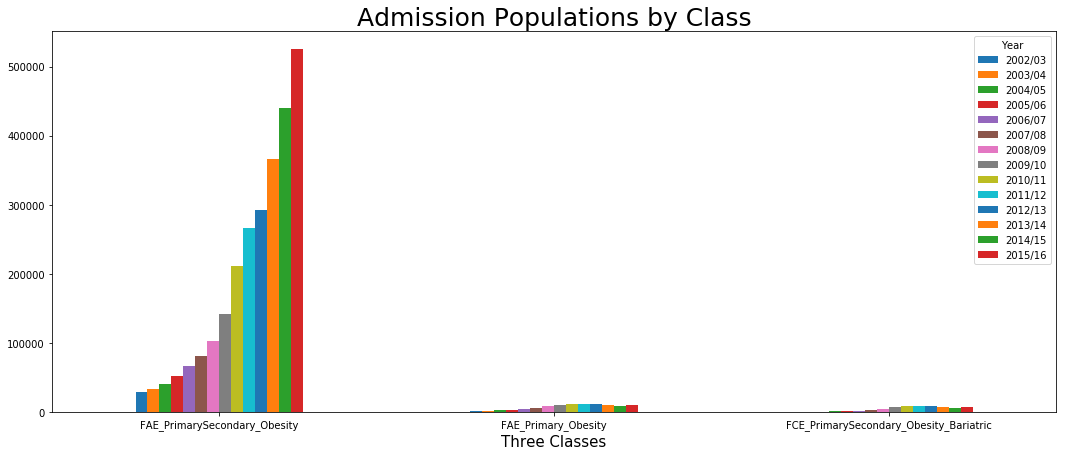

In [7]:
## 2.1 ##
import matplotlib.pyplot as plt
%matplotlib inline

df1_sp.plot(kind='bar', figsize=(18, 7))
plt.xticks(rotation=0) 
plt.xlabel('Three Classes', fontsize=15)
plt.title('Admission Populations by Class', fontsize=25)
plt.show()
#df1_sp.unstack('index').plot(kind='bar', figsize=(18, 7))

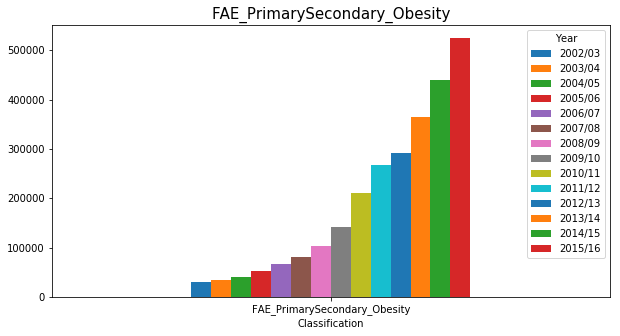

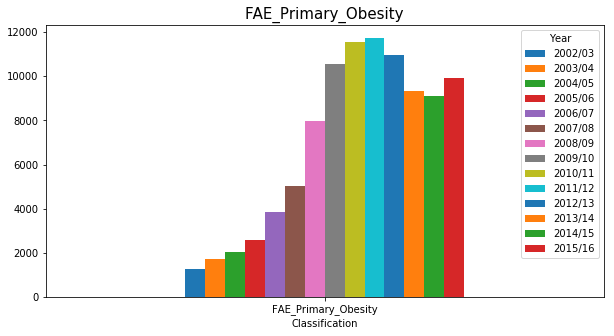

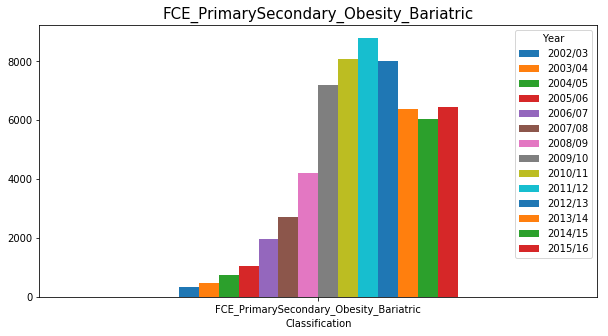

In [8]:
## 2.2 ## 
plt.figure()
df1_sp_ps = df1_sp[df1_sp.index =='FAE_PrimarySecondary_Obesity']
df1_sp_ps.plot(kind='bar', figsize=(10, 5))
plt.title('FAE_PrimarySecondary_Obesity', fontsize=15)
plt.xticks(rotation=0) 

df1_sp_p = df1_sp[df1_sp.index =='FAE_Primary_Obesity']
df1_sp_p.plot(kind='bar', figsize=(10, 5))
plt.title('FAE_Primary_Obesity', fontsize=15)
plt.xticks(rotation=0) 

df1_sp_psb = df1_sp[df1_sp.index =='FCE_PrimarySecondary_Obesity_Bariatric']
df1_sp_psb.plot(kind='bar', figsize=(10, 5))
plt.title('FCE_PrimarySecondary_Obesity_Bariatric', fontsize=15)
plt.xticks(rotation=0) 
plt.show()

In [9]:
## 3 ##
df1_g = df1[(df1.Metric_Primary=='Gender') & (df1.Metric_Secondary!='All persons')].drop(['ONS_Code','Org_Code','Org_Name','Metric_Primary','Count'], axis=1).reset_index(drop=True)

#df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).agg({'Value': sum}).rename(columns={'Value': 'Count by different class and gender'}).reset_index()
df1_g_c = df1_g.groupby(['Metric_Secondary', 'Classification']).mean().rename(columns={'Value': 'Count by different class and gender (average value)'}).reset_index()
df1_g_c = df1_g_c.sort_values(by=['Classification'])
df1_g_c = df1_g_c.round(1)

# separate different class
df1_g_c_ps = df1_g_c[df1_g_c.Classification=='FAE_PrimarySecondary_Obesity']
df1_g_c_p = df1_g_c[df1_g_c.Classification=='FAE_Primary_Obesity']
df1_g_c_psb = df1_g_c[df1_g_c.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']

Text(0.5,1,'FCE_PrimarySecondary_Obesity_Bariatric by Gender')

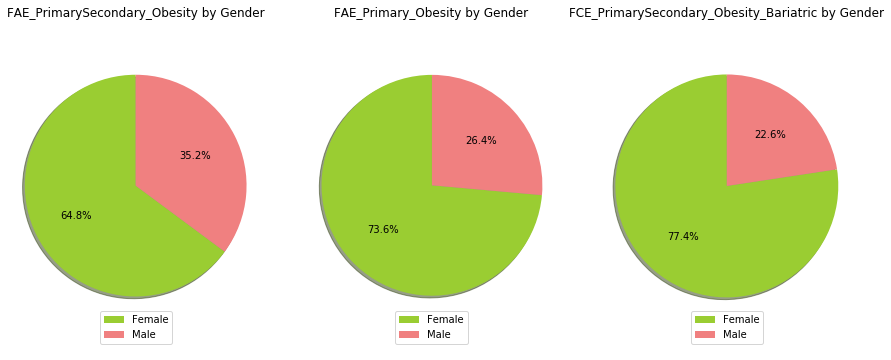

In [10]:
# plot pie chart
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
colors = ['yellowgreen', 'lightcoral']

plt.subplot(131)
patches, texts, junk = plt.pie(df1_g_c_ps['Count by different class and gender (average value)'], 
                         colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_ps['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_PrimarySecondary_Obesity by Gender', fontsize=12)


plt.subplot(132)
patches, texts, junk = plt.pie(df1_g_c_p['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_p['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FAE_Primary_Obesity by Gender', fontsize=12)


plt.subplot(133)
patches, texts, junk = plt.pie(df1_g_c_psb['Count by different class and gender (average value)'], 
                               colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
plt.legend(patches, df1_g_c_psb['Metric_Secondary'] , loc="lower center")
plt.axis('equal')
plt.title('FCE_PrimarySecondary_Obesity_Bariatric by Gender', fontsize=12)

In [45]:
## 4 ##

# Extract AgeGroup from df1
df1_AG = df1[df1.Metric_Primary=='AgeGroup']
df1_AG = df1_AG.drop(['ONS_Code','Org_Code','Org_Name','Count'], axis=1)

# see the average trend for each age group of obesity related hospital admissions
df1_AG_s = df1_AG.groupby(['Classification', 'Metric_Secondary']).mean().rename(columns={'Value': 'Average Value for each age group'}).reset_index()
df1_AG_s = df1_AG_s.round(0) 

# separate different obesity related hospital admissions
df1_AG_sps = df1_AG_s[df1_AG_s.Classification=='FAE_PrimarySecondary_Obesity']  
df1_AG_sp = df1_AG_s[df1_AG_s.Classification=='FAE_Primary_Obesity']  
df1_AG_spsb = df1_AG_s[df1_AG_s.Classification=='FCE_PrimarySecondary_Obesity_Bariatric']                                      

[Text(0,0.5,'Age Group'),
 Text(0.5,0,'Average Value'),
 Text(0.5,1,'Average value of FAE_PrimarySecondary_Obesity by age group')]

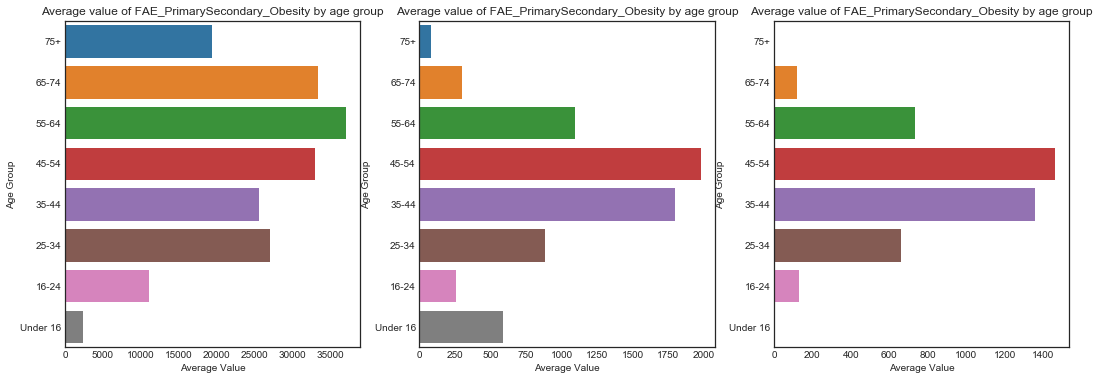

In [55]:
# plot
import seaborn as sns
fig, ax = plt.subplots(figsize=(18, 6))

plt.subplot(131)
sns.set_style('white')
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sps,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='Average value of FAE_PrimarySecondary_Obesity by age group')

plt.subplot(132)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_sp,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='Average value of FAE_PrimarySecondary_Obesity by age group')

plt.subplot(133)
bar_plot = sns.barplot(x='Average Value for each age group', y='Metric_Secondary', data=df1_AG_spsb,
           order=['75+','65-74','55-64','45-54','35-44','25-34','16-24','Under 16'])
bar_plot.set(xlabel='Average Value', ylabel='Age Group', title='Average value of FAE_PrimarySecondary_Obesity by age group')

#############################################################################################################

In [ ]:
# table of FAE_Primary_Obesity for different agegroup 
df1_AGp1 = df1_AG[df1_AG.Classification=='FAE_Primary_Obesity'].pivot(index='Metric_Secondary', columns='Year', values='Value')

# table of FAE_PrimarySecondary_Obesity for different agegroup 
df1_AGp2 = df1_AG[df1_AG.Classification=='FAE_PrimarySecondary_Obesity'].pivot(index='Metric_Secondary', columns='Year', values='Value')

# table of FCE_PrimarySecondary_Obesity_Bariatric for different agegroup 
df1_AGp3 = df1_AG[df1_AG.Classification=='FCE_PrimarySecondary_Obesity_Bariatric'].pivot(index='Metric_Secondary', columns='Year', values='Value')

In [12]:
# Idealy Count should have the same number as Gender-All persons by different year
df1.head(10)

Year   ONS_Code Org_Code Org_Name                Classification  \
0  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
1  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
2  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
3  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
4  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
5  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
6  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
7  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
8  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   
9  2002/03  E92000001      ENG  England  FAE_PrimarySecondary_Obesity   

  Metric_Primary Metric_Secondary  Value  Count  
0       AgeGroup            16-24    912  29199  
1       AgeGroup            25-34   2288  29199  
2       AgeGroup            35-44   4371  29199  
3       AgeGroup            45-54   5661  29199  
4       AgeGroup            55-64   6721  29199  
5       AgeGroup            65-74   5391  29199  
6       AgeGroup              75+   2738  29199  
7       AgeGroup         Under 16   1117  29199  
8         Gender      All persons  29237  29199  
9         Gender             Male  12068  29199

In [13]:
df2 = df2.sort_index(by=['Org_Name','Org_Type'])
df2 = df2.reset_index(drop=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [14]:
df2_A = df2[df2.Metric_Primary=='All persons']
df2_G = df2[df2.Metric_Primary!='All persons']
df2_A

Year             Org_Type   ONS_Code Org_Code  \
0     2015/16             National  E92000001      NaN   
3     2015/16             National  E92000001      NaN   
6     2015/16             National  E92000001      NaN   
9     2015/16  CommissioningRegion  E40000003      Y56   
12    2015/16  CommissioningRegion  E40000003      Y56   
15    2015/16  CommissioningRegion  E40000003      Y56   
18    2015/16  CommissioningRegion  E40000002      Y55   
21    2015/16  CommissioningRegion  E40000002      Y55   
24    2015/16  CommissioningRegion  E40000002      Y55   
27    2015/16                  CCG  E38000001      02N   
30    2015/16                  CCG  E38000001      02N   
33    2015/16                  CCG  E38000001      02N   
36    2015/16                  CCG  E38000002      09C   
39    2015/16                  CCG  E38000002      09C   
42    2015/16                  CCG  E38000002      09C   
45    2015/16                  CCG  E38000003      10Y   
48    2015/16                  CCG  E38000003      10Y   
51    2015/16                  CCG  E38000003      10Y   
54    2015/16                  CCG  E38000004      07L   
57    2015/16                  CCG  E38000004      07L   
60    2015/16                  CCG  E38000004      07L   
63    2015/16                  CCG  E38000005      07M   
66    2015/16                  CCG  E38000005      07M   
69    2015/16                  CCG  E38000005      07M   
72    2015/16                  CCG  E38000006      02P   
75    2015/16                  CCG  E38000006      02P   
78    2015/16                  CCG  E38000006      02P   
81    2015/16                  CCG  E38000007      99E   
84    2015/16                  CCG  E38000007      99E   
87    2015/16                  CCG  E38000007      99E   
...       ...                  ...        ...      ...   
1953  2015/16                  CCG  E38000204      07K   
1956  2015/16                  CCG  E38000204      07K   
1959  2015/16                  CCG  E38000204      07K   
1962  2015/16                  CCG  E38000205      02H   
1965  2015/16                  CCG  E38000205      02H   
1968  2015/16                  CCG  E38000205      02H   
1971  2015/16                  CCG  E38000206      99N   
1974  2015/16                  CCG  E38000206      99N   
1977  2015/16                  CCG  E38000206      99N   
1980  2015/16                  CCG  E38000207      11C   
1983  2015/16                  CCG  E38000207      11C   
1986  2015/16                  CCG  E38000207      11C   
1989  2015/16                  CCG  E38000208      12F   
1992  2015/16                  CCG  E38000208      12F   
1995  2015/16                  CCG  E38000208      12F   
1998  2015/16                  CCG  E38000209      11D   
2001  2015/16                  CCG  E38000209      11D   
2004  2015/16                  CCG  E38000209      11D   
2007  2015/16                  CCG  E38000210      06A   
2010  2015/16                  CCG  E38000210      06A   
2013  2015/16                  CCG  E38000210      06A   
2016  2015/16                  CCG  E38000211      06D   
2019  2015/16                  CCG  E38000211      06D   
2022  2015/16                  CCG  E38000211      06D   
2025  2015/16  CommissioningRegion  E40000001      Y54   
2028  2015/16  CommissioningRegion  E40000001      Y54   
2031  2015/16  CommissioningRegion  E40000001      Y54   
2034  2015/16  CommissioningRegion  E40000004      Y57   
2037  2015/16  CommissioningRegion  E40000004      Y57   
2040  2015/16  CommissioningRegion  E40000004      Y57   

                                  Org_Name  \
0                                  ENGLAND   
3                                  ENGLAND   
6                                  ENGLAND   
9                                   London   
12                                  London   
15                                  London   
18            Midlands and East of England   
21            Midlands and East of England  

In [15]:
df3 = df3.sort_index(by=['Org_Name'])

# data are all 2015/16
df3_p_name = df3[df3.Metric_Primary=='All persons'].pivot(index='Org_Name', columns='Classification', values='Value').reset_index()
#df3_p_type = df3[df3.Metric_Primary=='All persons'].pivot(index=['Org_Type','Org_Name'], columns='Classification', values='Value').reset_index()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [16]:
df1_fn = pd.value_counts(df1.Org_Name).reset_index(); print(df1_fn) # only 1 Name: England
df2_fn = pd.value_counts(df2.Org_Name).reset_index(); print(df2_fn.shape) # 227 Name
df2_ft = pd.value_counts(df2.Org_Type).reset_index(); print(df2_ft) # 4 org_type
df3_ft = pd.value_counts(df3.Org_Type).reset_index(); print(df3_ft) # 3 org_type
df3_fn = pd.value_counts(df3.Org_Name).reset_index(); print(df3_fn.shape) # 162 org_nam

     index  Org_Name
0  England       462
(227, 2)
                 index  Org_Type
0                  CCG      1881
1               Region       117
2  CommissioningRegion        36
3             National         9
            index  Org_Type
0  LocalAuthority      1368
1          Region        81
2        National         9
(162, 2)
